### **JEDNODIMENZIONE NUMERIČKE METODE**








In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

**1. GRADIJENTNE METODE**

Jednodimenzione gradijentne metode predstavljaju optimizacione algoritme koji nam omogućavaju da pronađemo stacionarne tačke funkcije *f(x)*, pod uslovom da je funkcija diferencijabilna do reda koji nam je potreban.

In [7]:
def func(x):
  f = x**2 - np.sin(2*x)
  return f

def dfunc(x):
  f = 2*x - 2*np.cos(2*x)
  return f

def ddfunc(x):
  f = 2 + 4*np.sin(2*x)
  return f

**1.1 NJUTN-RAPSONOV METOD**

Njutn-Rapsonova iterativna formula za jednodimenzioni problem može se izraziti matematički kao:
\begin{align}
        x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)},\\
\end{align}
gde $x_{n+1}$ vrednost naredne iteracije, $x_n$ trenutna vrednost, $f'(x_n)$ prvi izvod funkcije (gradijent), kao i $f''(x_n)$ drugi izvod funkcije u tački $x_n$. Ovaj proces se ponavlja iterativno sve dok se ne zadovolji određeni uslovi zaustavljanja. Najčešće ćemo se zaustaviti kada vrednosti iteracija postanu veoma biliske, odnosno:
\begin{align}
        |x_n - x_{n-1}|< ϵ, \\
\end{align}
gde $ϵ$ predstavlja toleranciju funkcije.Kao dodatni kriterijum za zaustavljanje može se koristiti i tzv. *prisilan kraj*. Ovakav način zaustavljanja podrazumeva da se unapred odredi maksimalan broj iteracija, jer ukoliko se ne izabere dobro početno pogađanje algoritam može da divergira i prvobitni kriterijum nikad neće biti zadovoljen.




In [8]:
def njutn_rapsonov_metod(x0, epsilon):
    x_novo = x0
    x_pre = math.inf

    x_niz = [x_novo]

    iter = 0
    max_iter = 30

    while (abs(x_pre - x_novo) > epsilon):
        iter += 1
        x_pre = x_novo
        x_novo = x_pre - dfunc(x_pre)/ddfunc(x_pre)

        x_niz.append(x_novo)

        if max_iter <= iter:
          break

    xopt = x_novo
    fopt = func(xopt)
    return xopt, fopt, iter, x_niz

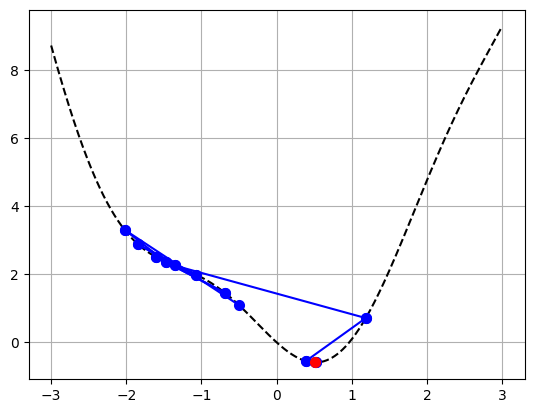

Stacionarna tačka funkcije f(x) je u 0.5149601404161019 a optimalna vrednost f-je iznosi -0.5920739993172587. Algoritam je izvršen u 11 iteracija.


In [9]:
[x_opt, f_opt, iter, x_niz] = njutn_rapsonov_metod(x0=-0.5, epsilon=0.1)

x = np.linspace(-3, 3, 1000)
f = np.linspace(0, 0, len(x))
for i in range(0, len(x), 1):
    f[i] = func(x[i])

plt.plot(x, f, 'k--', label='f(x)')

for i in range(0, len(x_niz)-1):
    plt.plot([x_niz[i], x_niz[i+1]], [func(x_niz[i] ), func(x_niz[i+1] )] , '-ob',  markersize=5, markeredgewidth=3)
plt.plot(x_opt, f_opt, '-or', label='max[f(x)]', markersize=5, markeredgewidth=3)
plt.grid(True)
plt.show()
print(f'Stacionarna tačka funkcije f(x) je u {x_opt} a optimalna vrednost f-je iznosi {f_opt}. Algoritam je izvršen u {iter} iteracija.')

**1.2 METOD SEČICE**

Osnovna razlika između metoda sečice i NJutn-Rapsonovog metoda je ta što se kod metoda sečice uvodi aproksimacija za drugi izvod:
\begin{align}
        f''(x_n) = \frac{f'(x_n) - f'(x_{n-1})}{x_n - x_{n-1}},\\
\end{align}
pa iterativna formula metoda sečice dobija sledeći oblik:
\begin{align}
        x_{n+1} = x_n - f'(x_n)\frac{x_n - x_{n-1}}{f'(x_n)-f'(x_{n-1})}.\\
\end{align}
Kao što se iz formule može videti, sada nije potrebno da funkcija bude diferencijabilna do drugog reda ali su nam sada neophodne dve početne tačke. Izborom dobrog početnog intervala (početnih tačaka) omogućavamo algoritmu da konvergira k.a optimumu.Ovaj pristup može smanjiti brzinu konvergencije u poređenju s NJutn-Rapsonovim metodom.

In [10]:
def metod_secice(x0, x1, epsilon):
    x_pre = x0
    x_novo = x1

    x_niz = [x_pre, x_novo]

    iter = 0

    while(abs(x_novo-x_pre) > epsilon):
        iter += 1
        x_ppre = x_pre
        x_pre = x_novo
        x_novo = x_pre-dfunc(x_pre)*(x_pre-x_ppre)/(dfunc(x_pre)-dfunc(x_ppre))

        x_niz.append(x_novo)

    x_opt = x_novo
    f_opt = func(x_opt)
    return x_opt, f_opt, iter, x_niz

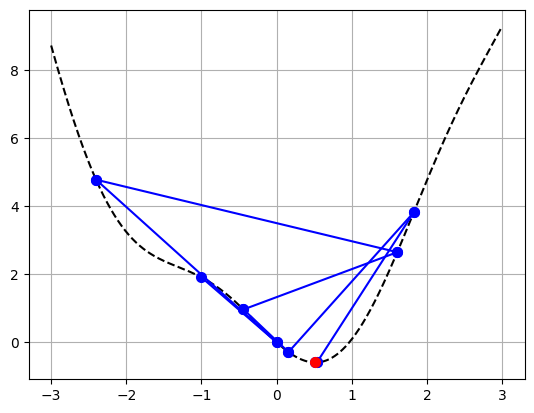

Optimum funkcije f(x) je u tački 0.5077214520673443 i iznosi -0.5919330806018976. Algoritam je izvršen u 7 iteracija.


In [11]:
[x_opt, f_opt, iter, x_niz] = metod_secice(x0=-1, x1=0, epsilon=0.1)

x = np.linspace(-3, 3, 1000)
f = np.linspace(0, 0, len(x))
for i in range(0, len(x), 1):
    f[i] = func(x[i])

plt.plot(x, f, 'k--', label='f(x)')

for i in range(0, len(x_niz)-1):
    plt.plot([x_niz[i], x_niz[i+1]], [func(x_niz[i] ), func(x_niz[i+1] )] , '-ob',  markersize=5, markeredgewidth=3)
plt.plot(x_opt, f_opt, '-or', label='max[f(x)]', markersize=5, markeredgewidth=3)
plt.grid(True)
plt.show()
print(f'Optimum funkcije f(x) je u tački {x_opt} i iznosi {f_opt}. Algoritam je izvršen u {iter} iteracija.')

**2. METODE DIREKTNOG PRETRAŽIVANJA**

Metode direktnog pretraživanja zahtevaju da kriterijum bude unimodalna funkcija. Na taj način se obezbeđuje da smanjenjem interval pretrage nećemo izgubiti optimum.

**2.1 FIBONAČIJEV METOD**

Fibonačijev metod traženja minimuma jednodimenzionalne funkcije je numerička metoda koja koristi niz Fibonačijevih brojeva kako bi aproksimirala poziciju minimuma (ili maksimuma) funkcije. Na samom početku generiše se Fibonačijev niz dok dužina početnog intervala ne postane manja od zadate tolerancije $ϵ$, odnosno kriterijum zaustavljanja postaje:
\begin{align}
        F_n > \frac{b_0-a_0}{ϵ}.\\
\end{align}
Redni broj Fibonačijevog broja u nizu, $n$, koji zadovoljava kriterijum zaustavljanja, predstavlja ujedno i broj iteracija.
Tokom svake iteracije, potrebno je izračunati i nove tačke unutar intervala i to na sledeći način:
\begin{align}
        x_1 &= a + \frac{F_{n-2}}{F_n}(b-a)\\
        x_2 &= a + b - x_1.\\
\end{align}
Koji će se opseg odbaciti zavisi od problema koji se rešava, minimizacije ili maksimizacije funkcije.

In [ ]:
def fibonacijev_broj(n):
    if n == 1 or n == 2:
        f = 1
    else:
        fp = 1
        fpp = 1
        for i in range(3, n+1):
            f = fp + fpp
            fpp = fp
            fp = f
    return f

In [ ]:
def fibonacijev_metod(a, b, epsilon):

    n = 1
    while ((b-a)/epsilon) > fibonacijev_broj(n):
        n += 1

    x1 = a + fibonacijev_broj(n-2)/fibonacijev_broj(n)*(b-a)
    x2 = a + b - x1

    for i in range(2, n+1):
        if func(x1) <= func(x2):
            b = x2
            x1 = a + fibonacijev_broj(n-2)/fibonacijev_broj(n)*(b-a)
            x2 = a + b - x1
        else:
            a = x1
            x1 = a + fibonacijev_broj(n-2)/fibonacijev_broj(n)*(b-a)
            x2 = a + b - x1

    if func(x1) < func(x2):
        x_opt = x1
        f_opt = func(x_opt)
    else:
        x_opt = x2
        f_opt = func(x_opt)

    return x_opt, f_opt, n

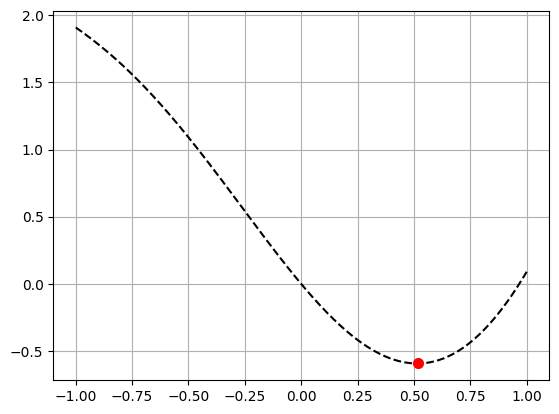

Minimum funkcije f(x) je u tački 0.5192708278113745 i iznosi -0.5920228743564877. Algoritam je izvršen u 9 iteracija. Fibonačijev broj je 34


In [ ]:
[x_opt, f_opt, iter] = fibonacijev_metod(a=-1, b=2, epsilon=0.1)

x = np.linspace(-1, 1, 1000)
f = np.linspace(0, 0, len(x))
for i in range(0, len(x), 1):
    f[i] = func(x[i])

plt.plot(x, f, 'k--', label='f(x)')
plt.plot(x_opt, f_opt, '-or', label='max[f(x)]', markersize=5, markeredgewidth=3)
plt.grid(True)
plt.show()
print(f'Minimum funkcije f(x) je u tački {x_opt} i iznosi {f_opt}. Algoritam je izvršen u {iter} iteracija. Fibonačijev broj je {fibonacijev_broj(iter)}')

**2.2 METOD ZLATNOG PRESEKA**

Ovaj metod je sličan Fibonačijevom metodu, ali ne koristi niz Fibonačijevih brojeva već konstantnu proporciju. Ideja ovog metoda je da podeli interval pretrage na dva dela u tački koja deli interval "zlatnim presekom". Da se primetiti da odnos $\frac{F_{n-2}}{F_n}$ za velike Fibonačijeve brojeve je konstantan i ta konstanta iznosi oko 0.38196. Taj broj zapravo predstavlja "zlatni presek" i iznosi $c=\frac{3-\sqrt{5}}{2}$.

In [ ]:
def metod_zlatnog_preseka(a, b, epsilon):

    c = (3 - math.sqrt(5)) / 2

    x1 = a + c * (b - a)
    x2 = a + b - x1
    iter = 1

    x_niz = []

    while (b - a) > epsilon:
        iter += 1
        if func(x1) <= func(x2):
            b = x2
            x1 = a + c * (b - a)
            x2 = a + b - x1
        else:
            a = x1
            x1 = a + c * (b - a)
            x2 = a + b - x1

    if func(x1) < func(x2):
      x_opt = x1
      f_opt = func(x_opt)
    else:
      x_opt = x2
      f_opt = func(x_opt)
    return x_opt, f_opt, iter

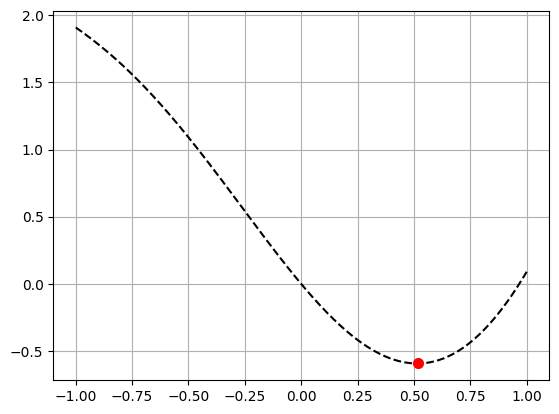

Minimum funkcije f(x) je u tački 0.5197334262446374 i iznosi -0.5920113802625233. Algoritam je izvršen u 9 iteracija.


In [ ]:
[x_opt, f_opt, iter] = metod_zlatnog_preseka(a=-1, b=2, epsilon=0.1)

x = np.linspace(-1, 1, 1000)
f = np.linspace(0, 0, len(x))
for i in range(0, len(x), 1):
    f[i] = func(x[i])

plt.plot(x, f, 'k--', label='f(x)')
plt.plot(x_opt, f_opt, '-or', label='max[f(x)]', markersize=5, markeredgewidth=3)
plt.grid(True)
plt.show()
print(f'Minimum funkcije f(x) je u tački {x_opt} i iznosi {f_opt}. Algoritam je izvršen u {iter} iteracija.')

Za vežbu: Napisati algoritme koji traže maksimum.